In [17]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'
!wget $data -O CreditScoring.csv

--2026-01-06 12:58:48--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv’

CreditScoring.csv   100%[===================>] 178.21K  --.-KB/s    in 0.03s   

2026-01-06 12:58:48 (6.37 MB/s) - ‘CreditScoring.csv’ saved [182489/182489]



In [18]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [19]:

df = pd.read_csv('CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [20]:
df.columns = df.columns.str.lower() # make all column headers lowercase
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [21]:
# we see that there are some categorical variables represented as numbers
# the categories are defined in an R file in the original repo
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [22]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}
df.status = df.status.map(status_values)

In [23]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [24]:
# let's do this for all categorical variables
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)


In [25]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [27]:
df.describe().round() #what's going on with numerical values?
# looks like there's a bunch of 99999999 values representing missing values

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [30]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(99999999, np.nan)

In [31]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [32]:
# we also don't know what to do with the 'unk' categories, best to remove the entire entry
df = df[df.status != 'unk'].reset_index(drop=True)

In [34]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
951,default,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
688,default,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2233,ok,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3304,default,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
2271,ok,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,ok,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
1784,ok,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
808,ok,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
1857,ok,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


In [35]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [37]:
# finally, we turn the target into a binary variable
y_train = (df_train.status == 'default').astype(int)
y_val = (df_val.status == 'default').astype(int)
y_test = (df_test.status == 'default').astype(int)

In [38]:
del df_train['status']
del df_val['status']
del df_test['status']

In [39]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


In [40]:
# excellent, now let's use this data to train a decision tree model

# 6.3 Decision Trees

In [42]:
# fundamentally it's a series of if-then-else rules, for example:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [44]:
xi = df_train.iloc[0].to_dict()

In [45]:
assess_risk(xi)

'ok'

In [47]:
# instead of encoding this manually, we can use a decision tree model to learn the rules from data
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_train

array([[3.60e+01, 1.00e+03, 1.00e+04, ..., 0.00e+00, 1.00e+01, 3.60e+01],
       [3.20e+01, 1.10e+03, 0.00e+00, ..., 1.00e+00, 6.00e+00, 4.80e+01],
       [4.00e+01, 1.32e+03, 0.00e+00, ..., 0.00e+00, 1.00e+00, 4.80e+01],
       ...,
       [1.90e+01, 4.00e+02, 0.00e+00, ..., 0.00e+00, 1.00e+00, 2.40e+01],
       [4.30e+01, 2.50e+03, 1.80e+04, ..., 0.00e+00, 1.50e+01, 4.80e+01],
       [2.70e+01, 4.50e+02, 5.00e+03, ..., 1.00e+00, 1.20e+01, 4.80e+01]],
      shape=(2672, 29))

In [48]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [52]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = dt.predict_proba(X_val)[:, 1]
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

In [51]:
# is it any good?
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.6415320529897557

In [53]:
# it's not very good. what's the score for the training dataset?
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.9993169398907105

In [55]:
# This is called overfitting. The model learned the training data too well,
# including its noise and outliers, which negatively impacts its performance on new,
# unseen data. It's like it memorized the answers instead of learning the underlying
# patterns.

# If we let our tree grow unrestricted, it grows too deep and learns every special case
# in the training data. To prevent this, we can limit the tree's depth using the
# max_depth parameter. This way, the tree focuses on the most important patterns,
# improving its ability to generalize to new data.

# Let's retrain the model with a max_depth of 3

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7389079944782155

In [56]:
# compared to training data:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.7761016984958594

In [ ]:
# Much better!
# we can actually even look into the tree structure
from sklearn.tree import export_text
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



But how does the DT extract these rules from data?
# 6.4 Decision tree learning algorithm

Every node of the tree (except leaves) splits the dataset into 2 parts: where condition > T is true, and where it's false. It's a matter of figuring out a good threshold T for this split at every node.

There are multiple possible split evaluation criteria. We can sort the dataset by a given trait, take all possible splits, and evaluate how many errors we have in each of the 2 parts. In other words, we look at the misclassification rate. We can average between errors in both parts to get an average misclassification rate.

E.g. how many "default" ended up in the "ok" part, and how many "ok" ended up in the "default" part. In general, this is called impurity. Lowest impurity = best split threshold.


In summary, for a given node:
```
for f in features:
    find all thresholds for f
    for t in thresholds:
        split dataset using f>t condition
        compute impurity of this split
select the condition with lowest impurity
```
Then for the next node level, we check stopping criteria and keep iterating if these criteria allow. For example:
* is the group already pure? If it has 0% impurity, it doesn't make any sense to split further
* max_depth parameter - If we reached depth limit, we stop
* is the group too small - If we reached minimum group size, we stop and make a decision even if it's impure to some extent, to prevent overfitting.

# 6.5 Decision Trees Parameter Tuning



In [ ]:
# we want to find DT parameters to maximize the AUC on validation data

for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    
    dt = DecisionTreeClassifier(max_depth = d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print(f'max_depth=%4s => AUC=%.3f' % (d, auc))

max_depth=   1 => AUC=0.606
max_depth=   2 => AUC=0.669
max_depth=   3 => AUC=0.739
max_depth=   4 => AUC=0.761
max_depth=   5 => AUC=0.766
max_depth=   6 => AUC=0.759
max_depth=  10 => AUC=0.698
max_depth=  15 => AUC=0.651
max_depth=  20 => AUC=0.670
max_depth=None => AUC=0.652


In [61]:
# depths 4-6 seem to work well
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]: #min. number of samples to be a leaf node
        dt = DecisionTreeClassifier(max_depth = d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        print(f'max_depth=%4s min_samples_leaf=%4s => AUC=%.3f' % (d, s, auc))

max_depth=   4 min_samples_leaf=   1 => AUC=0.761
max_depth=   4 min_samples_leaf=   2 => AUC=0.761
max_depth=   4 min_samples_leaf=   5 => AUC=0.761
max_depth=   4 min_samples_leaf=  10 => AUC=0.761
max_depth=   4 min_samples_leaf=  15 => AUC=0.763
max_depth=   4 min_samples_leaf=  20 => AUC=0.760
max_depth=   4 min_samples_leaf= 100 => AUC=0.756
max_depth=   4 min_samples_leaf= 200 => AUC=0.747
max_depth=   4 min_samples_leaf= 500 => AUC=0.680
max_depth=   5 min_samples_leaf=   1 => AUC=0.766
max_depth=   5 min_samples_leaf=   2 => AUC=0.766
max_depth=   5 min_samples_leaf=   5 => AUC=0.768
max_depth=   5 min_samples_leaf=  10 => AUC=0.762
max_depth=   5 min_samples_leaf=  15 => AUC=0.772
max_depth=   5 min_samples_leaf=  20 => AUC=0.772
max_depth=   5 min_samples_leaf= 100 => AUC=0.763
max_depth=   5 min_samples_leaf= 200 => AUC=0.759
max_depth=   5 min_samples_leaf= 500 => AUC=0.680
max_depth=   6 min_samples_leaf=   1 => AUC=0.754
max_depth=   6 min_samples_leaf=   2 => AUC=0.754


In [62]:
# this is kinda hard to read, let's put it in a DataFrame

scores = []

for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]: #min. number of samples to be a leaf node
        dt = DecisionTreeClassifier(max_depth = d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append({
            'max_depth': d,
            'min_samples_leaf': s,
            'auc': auc
        })

In [63]:
df_scores = pd.DataFrame(scores)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.760726
1,4,2,0.760726
2,4,5,0.760726
3,4,10,0.760726
4,4,15,0.763223


In [64]:
df_scores.sort_values(by='auc', ascending=False).head(10)

,max_depth,min_samples_leaf,auc
22,6,15,0.785889
21,6,10,0.778169
24,6,100,0.776604
23,6,20,0.773958
14,5,20,0.772272
13,5,15,0.772099
20,6,5,0.769338
25,6,200,0.768642
11,5,5,0.767664
10,5,2,0.766429


In [68]:
# we can also pivot for readability

df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns='max_depth', values='auc')
df_scores_pivot.round(3)

max_depth,4,5,6
min_samples_leaf,,,
1,0.761,0.766,0.748
2,0.761,0.766,0.754
5,0.761,0.768,0.769
10,0.761,0.762,0.778
15,0.763,0.772,0.786
20,0.760,0.772,0.774
100,0.756,0.763,0.777
200,0.747,0.759,0.769
500,0.680,0.680,0.680


<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>

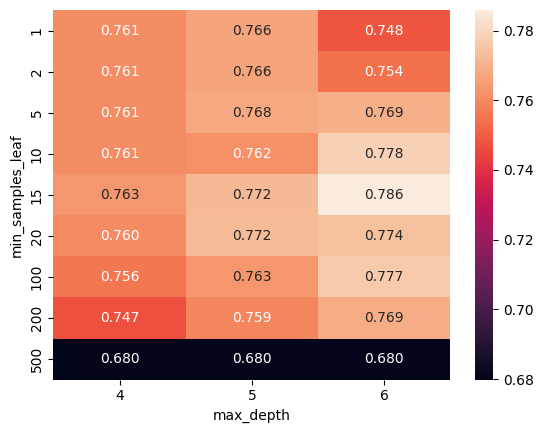

In [69]:
# heat map
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>

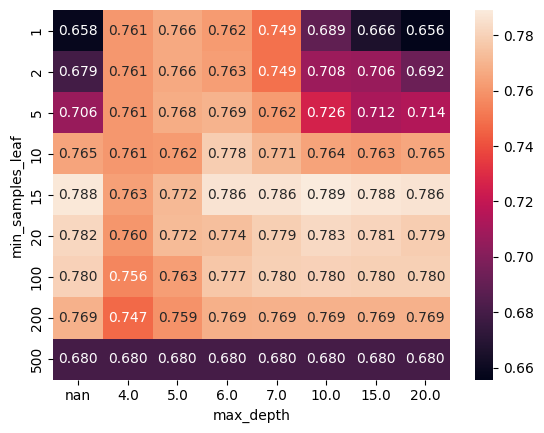

In [ ]:
# but what if it was wrong to limit the depth early on? it makes sense on large datasets,
# but we have a small dataset here. let's try again with a larger depth

scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]: #min. number of samples to be a leaf node
        dt = DecisionTreeClassifier(max_depth = d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append({
            'max_depth': d,
            'min_samples_leaf': s,
            'auc': auc
        })

df_scores = pd.DataFrame(scores)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns='max_depth', values='auc')

sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [72]:
# final choice
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# 6.6 Ensemble Learning and Random Forest

As if we asked n experts for an opinion, we can have n different decision trees. Each returns a score for a given question, we take the average.

Each tree is trained on a different randomly selected subset of features (e.g. out of 10 features, each tree is trained on a different subset of 7 features).

Such a collection of trees is a random forest.

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [83]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.804146181976702

In [ ]:
# it's roughly as good as our best decision tree, and we didn't have to tune
# any parameters!

# only problem: each time we retrain, we get different results, because the random split
# of features is different each time... we should fix the random seed
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

In [95]:
# always the same:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)
rf.predict_proba(X_val[[0]])

array([[1., 0.]])

In [96]:
# let's see what we can tune...
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

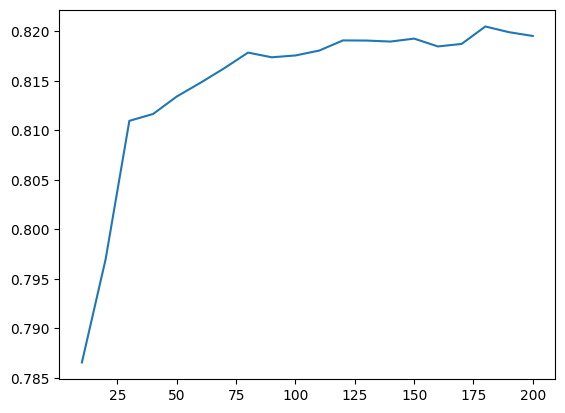

In [97]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators, df_scores.auc)

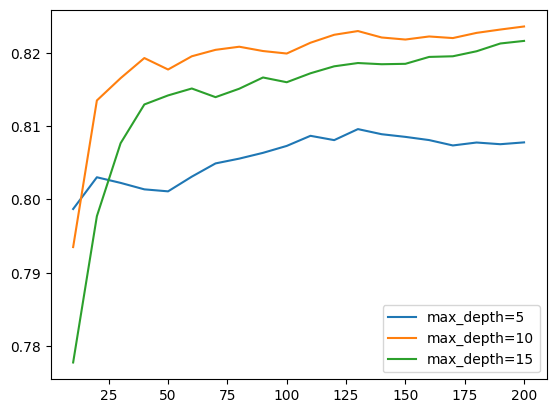

In [98]:
# all the params we tune on single trees can be tuned on random forests as well

scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'auc'])
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f'max_depth={d}')
plt.legend()

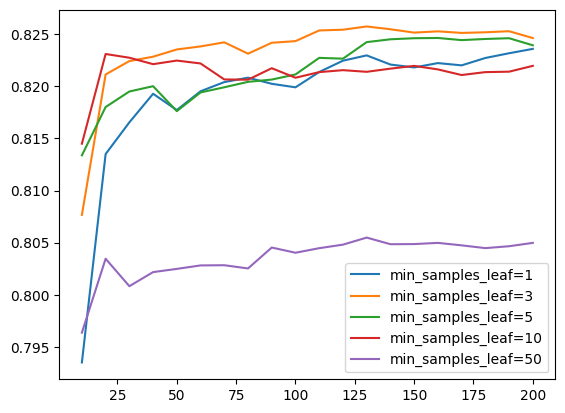

In [100]:
# max_depth=10 seems to work best here - let's consider it selected
max_depth=10

scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=10,
                                    min_samples_leaf=s, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

df_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'n_estimators', 'auc'])
for s in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f'min_samples_leaf={s}')
plt.legend()

In [102]:
# min_samples_leaf=3 seems to work best here - let's consider it selected
min_samples_leaf=3

rf = RandomForestClassifier(n_estimators=100,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1,
                            n_jobs=-1 #use all CPU cores
                            )
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


We'll next look at a different way of combining models called boosting.

# 6.7 Gradient boosting and XGBoost

We look at boosting, a different way to combine models.

We start from a tree, train, and then look at its errors. Based on them, we train another model. This model makes predictions again, it makes errors. Based on these, we train a third model, etc. At the end we combine multiple prediction into a final prediction. Each model tries to correct the mistakes of the previous one.

Unlike random forests, we cannot train in parallel. If the models are trees, we call it gradient boosting trees.

A library that implements this is XGBoost.

In [103]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 75.2 MB/s  0:00:01 eta 0:00:01


In [107]:
import xgboost as xgb

# xgb wants data in a special format
feature_names = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)

dval = xgb.DMatrix(X_val, label=y_val, feature_names=feature_names)

In [113]:
xgb_params = {
    'eta': 0.3, #learning rate
    'max_depth': 6,
    'min_child_weight': 1, #similar to min_samples_leaf

    'objective': 'binary:logistic', #binary classification
    'nthread': 8, #number of CPU threads

    'seed': 1,
    'verbosity': 1,
}


model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [114]:
y_pred = model.predict(dval)

roc_auc_score(y_val, y_pred)

0.8172997747693203

In [119]:
# This score is already quite good with no tuning! Note that XGBoost is prone to overfitting,
# so tuning parameters like max_depth and min_child_weight could further enhance performance.

# XGBoost also allows us to monitor performance during training
watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.3, #learning rate
    'max_depth': 6,
    'min_child_weight': 1, #similar to min_samples_leaf

    'objective': 'binary:logistic', #binary classification
    'nthread': 8, #number of CPU threads

    'seed': 1,
    'verbosity': 1,

    'eval_metric': 'auc'
}

# evals = watchlist to monitor performance
# verbose_eval=5 to print results every 5 rounds
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=200)

[0]	train-auc:0.86652	val-auc:0.78098
[5]	train-auc:0.92838	val-auc:0.81441
[10]	train-auc:0.95360	val-auc:0.81627
[15]	train-auc:0.96732	val-auc:0.81662
[20]	train-auc:0.97453	val-auc:0.81706
[25]	train-auc:0.98171	val-auc:0.81778
[30]	train-auc:0.98747	val-auc:0.81445
[35]	train-auc:0.99125	val-auc:0.81528
[40]	train-auc:0.99438	val-auc:0.81283
[45]	train-auc:0.99596	val-auc:0.81291
[50]	train-auc:0.99759	val-auc:0.81111
[55]	train-auc:0.99840	val-auc:0.80858
[60]	train-auc:0.99884	val-auc:0.80937
[65]	train-auc:0.99917	val-auc:0.80988
[70]	train-auc:0.99962	val-auc:0.80916
[75]	train-auc:0.99978	val-auc:0.80965
[80]	train-auc:0.99986	val-auc:0.80885
[85]	train-auc:0.99992	val-auc:0.80895
[90]	train-auc:0.99995	val-auc:0.80885
[95]	train-auc:0.99999	val-auc:0.80976
[100]	train-auc:0.99999	val-auc:0.80995
[105]	train-auc:1.00000	val-auc:0.80963
[110]	train-auc:1.00000	val-auc:0.80899
[115]	train-auc:1.00000	val-auc:0.80845
[120]	train-auc:1.00000	val-auc:0.80868
[125]	train-auc:1.0000

In [ ]:
# Note how the validation AUC improves during training and then goes slightly down,
# indicating the onset of overfitting.

# There is no easy way to extract the evaluation data from XGBoost during training,
# so we can't plot it unless we capture it manually with IPython capture.

In [120]:
%%capture output

watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.3, #learning rate
    'max_depth': 6,
    'min_child_weight': 1, #similar to min_samples_leaf

    'objective': 'binary:logistic', #binary classification
    'nthread': 8, #number of CPU threads

    'seed': 1,
    'verbosity': 1,

    'eval_metric': 'auc'
}

# evals = watchlist to monitor performance
# verbose_eval=5 to print results every 5 rounds
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=200)

In [121]:
print(output.stdout)

[0]	train-auc:0.86652	val-auc:0.78098
[5]	train-auc:0.92838	val-auc:0.81441
[10]	train-auc:0.95360	val-auc:0.81627
[15]	train-auc:0.96732	val-auc:0.81662
[20]	train-auc:0.97453	val-auc:0.81706
[25]	train-auc:0.98171	val-auc:0.81778
[30]	train-auc:0.98747	val-auc:0.81445
[35]	train-auc:0.99125	val-auc:0.81528
[40]	train-auc:0.99438	val-auc:0.81283
[45]	train-auc:0.99596	val-auc:0.81291
[50]	train-auc:0.99759	val-auc:0.81111
[55]	train-auc:0.99840	val-auc:0.80858
[60]	train-auc:0.99884	val-auc:0.80937
[65]	train-auc:0.99917	val-auc:0.80988
[70]	train-auc:0.99962	val-auc:0.80916
[75]	train-auc:0.99978	val-auc:0.80965
[80]	train-auc:0.99986	val-auc:0.80885
[85]	train-auc:0.99992	val-auc:0.80895
[90]	train-auc:0.99995	val-auc:0.80885
[95]	train-auc:0.99999	val-auc:0.80976
[100]	train-auc:0.99999	val-auc:0.80995
[105]	train-auc:1.00000	val-auc:0.80963
[110]	train-auc:1.00000	val-auc:0.80899
[115]	train-auc:1.00000	val-auc:0.80845
[120]	train-auc:1.00000	val-auc:0.80868
[125]	train-auc:1.0000

In [130]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    df_results = pd.DataFrame(results, columns=['num_iter', 'train_auc', 'val_auc'])
    return df_results

df_score = parse_xgb_output(output)
df_score

,num_iter,train_auc,val_auc
0,0,0.86652,0.78098
1,5,0.92838,0.81441
2,10,0.95360,0.81627
3,15,0.96732,0.81662
4,20,0.97453,0.81706
5,25,0.98171,0.81778
6,30,0.98747,0.81445
7,35,0.99125,0.81528
8,40,0.99438,0.81283
9,45,0.99596,0.81291


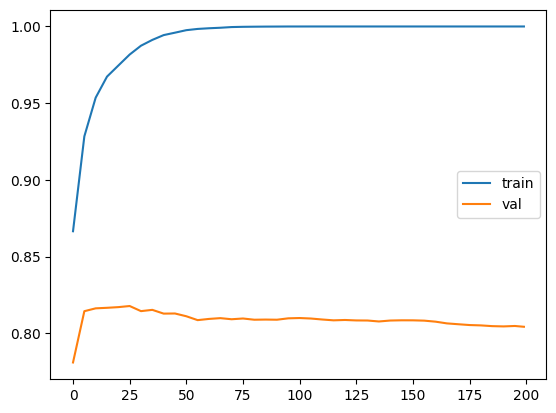

In [133]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

We can see that the model starts overfitting after around 25 iterations.

We want to tune the parameters to reduce overfitting and improve validation AUC.

# 6.8 XGBoost parameter tuning

We will be tuning:

* `eta`
* `max_depth`
* `min_child_weight`

in this order.

In [136]:
# eta= how much weight the next model has when correcting errors of previous models
# lower eta means slower learning, usually better results, but needs more rounds

In [135]:
%%capture output

watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.3, #learning rate
    'max_depth': 6,
    'min_child_weight': 1, #similar to min_samples_leaf

    'objective': 'binary:logistic', #binary classification
    'nthread': 8, #number of CPU threads

    'seed': 1,
    'verbosity': 1,

    'eval_metric': 'auc'
}

# evals = watchlist to monitor performance
# verbose_eval=5 to print results every 5 rounds
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=200)

In [140]:
scores = {}
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
scores['eta=0.3']

,num_iter,train_auc,val_auc
0,0,0.86652,0.78098
1,5,0.92838,0.81441
2,10,0.95360,0.81627
3,15,0.96732,0.81662
4,20,0.97453,0.81706
5,25,0.98171,0.81778
6,30,0.98747,0.81445
7,35,0.99125,0.81528
8,40,0.99438,0.81283
9,45,0.99596,0.81291


In [146]:
%%capture output

watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 1.0,
    'max_depth': 6,
    'min_child_weight': 1, #similar to min_samples_leaf

    'objective': 'binary:logistic', #binary classification
    'nthread': 8, #number of CPU threads

    'seed': 1,
    'verbosity': 1,

    'eval_metric': 'auc'
}

# evals = watchlist to monitor performance
# verbose_eval=5 to print results every 5 rounds
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=200)

In [147]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [148]:
scores['eta=1.0']

,num_iter,train_auc,val_auc
0,0,0.86652,0.78098
1,5,0.95829,0.80308
2,10,0.98611,0.78945
3,15,0.99542,0.78886
4,20,0.99932,0.78435
5,25,0.99992,0.78648
6,30,0.99999,0.78743
7,35,1.00000,0.78818
8,40,1.00000,0.79047
9,45,1.00000,0.79194


In [149]:
%%capture output

watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1, #similar to min_samples_leaf

    'objective': 'binary:logistic', #binary classification
    'nthread': 8, #number of CPU threads

    'seed': 1,
    'verbosity': 1,

    'eval_metric': 'auc'
}

# evals = watchlist to monitor performance
# verbose_eval=5 to print results every 5 rounds
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=200)

In [150]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
scores['eta=0.1']

,num_iter,train_auc,val_auc
0,0,0.86652,0.78098
1,5,0.90214,0.79405
2,10,0.91877,0.80464
3,15,0.92961,0.81029
4,20,0.94058,0.81534
5,25,0.94776,0.81560
6,30,0.95237,0.81841
7,35,0.95757,0.82111
8,40,0.96160,0.82213
9,45,0.96515,0.82239


In [151]:
%%capture output

watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1, #similar to min_samples_leaf

    'objective': 'binary:logistic', #binary classification
    'nthread': 8, #number of CPU threads

    'seed': 1,
    'verbosity': 1,

    'eval_metric': 'auc'
}

# evals = watchlist to monitor performance
# verbose_eval=5 to print results every 5 rounds
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=200)

In [153]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
scores['eta=0.05']

,num_iter,train_auc,val_auc
0,0,0.86652,0.78098
1,5,0.88698,0.79587
2,10,0.90073,0.79636
3,15,0.90814,0.79971
4,20,0.91672,0.80725
5,25,0.92303,0.80755
6,30,0.92845,0.81072
7,35,0.93378,0.81360
8,40,0.93950,0.81574
9,45,0.94310,0.81694


In [154]:
%%capture output

watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1, #similar to min_samples_leaf

    'objective': 'binary:logistic', #binary classification
    'nthread': 8, #number of CPU threads

    'seed': 1,
    'verbosity': 1,

    'eval_metric': 'auc'
}

# evals = watchlist to monitor performance
# verbose_eval=5 to print results every 5 rounds
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=200)

In [155]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
scores['eta=0.01']

,num_iter,train_auc,val_auc
0,0,0.86652,0.78098
1,5,0.86982,0.77997
2,10,0.87242,0.78086
3,15,0.87593,0.78637
4,20,0.87807,0.78976
5,25,0.88665,0.79534
6,30,0.89264,0.79948
7,35,0.89596,0.79985
8,40,0.89783,0.79871
9,45,0.89927,0.79720


In [156]:
scores.keys()

dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

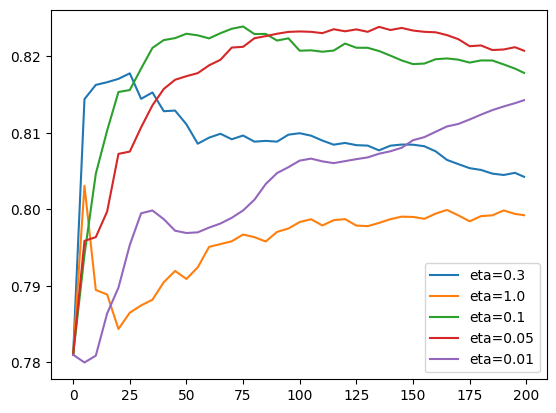

In [157]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

In [160]:
# Let's go with 0.1. We now look at max_depth.
eta = 0.1
scores = {}

In [169]:
%%capture output

watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.1,
    'max_depth': 10, # I keep editing it here and rerunning to test, rather than copypasting many times
    'min_child_weight': 1, #similar to min_samples_leaf

    'objective': 'binary:logistic', #binary classification
    'nthread': 8, #number of CPU threads

    'seed': 1,
    'verbosity': 1,

    'eval_metric': 'auc'
}

# evals = watchlist to monitor performance
# verbose_eval=5 to print results every 5 rounds
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=200)

In [170]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
scores['max_depth=10']

,num_iter,train_auc,val_auc
0,0,0.91827,0.77161
1,5,0.96315,0.78724
2,10,0.98001,0.79312
3,15,0.98916,0.79641
4,20,0.99394,0.80078
5,25,0.99663,0.80416
6,30,0.99807,0.80567
7,35,0.99900,0.80604
8,40,0.99951,0.80644
9,45,0.99970,0.80713


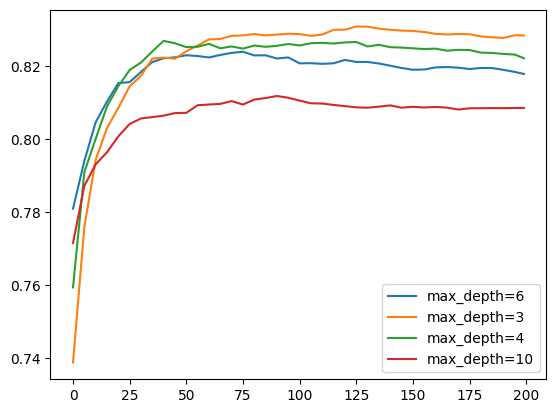

In [171]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.legend()

In [173]:
# We see that max_depth=10 is always bad, and actually 3 is eventually the best after many iterations.
# It learns slower but better. Let's now look at min_child_weight.

max_depth = 3
scores = {}

In [179]:
%%capture output

watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,  # I keep editing it here and rerunning to test, rather than copypasting many times

    'objective': 'binary:logistic', #binary classification
    'nthread': 8, #number of CPU threads

    'seed': 1,
    'verbosity': 1,

    'eval_metric': 'auc'
}

# evals = watchlist to monitor performance
# verbose_eval=5 to print results every 5 rounds
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=200)

In [180]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
scores['min_child_weight=30']

,num_iter,train_auc,val_auc
0,0,0.76455,0.73369
1,5,0.82726,0.77541
2,10,0.84502,0.79427
3,15,0.85463,0.80428
4,20,0.86012,0.80706
5,25,0.86540,0.81224
6,30,0.87128,0.81761
7,35,0.87380,0.82018
8,40,0.87716,0.82236
9,45,0.87955,0.82548


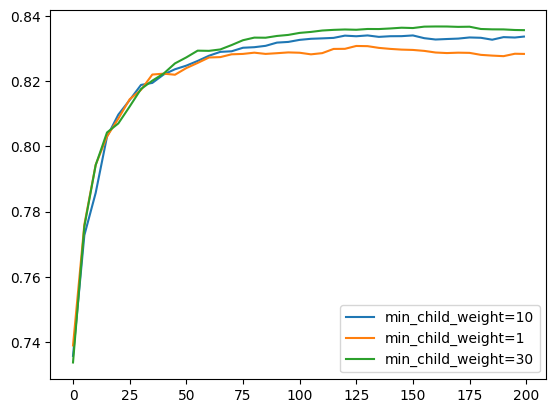

In [181]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.legend()

In [183]:
# The course says there's not much difference but I see that min_child_weight=30 is clearly better than 1.
# It also seems like a good idea to train for about 175 iterations.

# 6.9 Selecting the final model

We can take our best DT, our best RF, and our best XGBoost model, and compute the roc_auc_score. The final XGBoost seems to be the best at around 0.836.

We can now evaluate it on our test data.

In [188]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = (df_full_train.status == 'default').astype(int)
del df_full_train['status']

dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

AttributeError: 'DataFrame' object has no attribute 'status'

In [190]:

d_full_train = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=dv.get_feature_names_out().tolist())

d_test = xgb.DMatrix(X_test, feature_names=dv.get_feature_names_out().tolist())

In [191]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30, #my choice, not the course

    'objective': 'binary:logistic', #binary classification
    'eval_metric': 'auc',

    'nthread': 8, #number of CPU threads
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, d_full_train, num_boost_round=175)

In [193]:
y_pred = model.predict(d_test)
roc_auc_score(y_test, y_pred)
# it's a little bit worse but consistent! our model didn't overfit, it generalized well

0.831618689213626

XGBoost tends to be the best model for tabular data. But it's more complex, a lot of parameters to tune.
It's easier to overfit, but you can often hope for better performance than plain DT or RF.